# Onur Poyraz 2016705069

In [1]:
%matplotlib inline
import numpy as np
from scipy.special import gamma,gammaln
import matplotlib.pyplot as plt

### 1.Repeat the fake/fair coin example covered in class with a prior probability of form 0.5Beta(20,3) + 0.5Beta(3,20)

If the coin is fair then m = 0;

$$
p(X|m=0)=\int p(X|\pi)\delta(\pi-0.5)p(m=0)d\pi
\\
=\prod_{i=1}^N \left(\frac{1}{2}\right)^{x^i} \left(\frac{1}{2}\right)^{1-x^i} = \frac{1}{2^N}
$$

If the coin is fake then m = 1;

$$
p(X|m=1)=\int p(\pi; 3, 20) \prod_{i=1}^{N} p(x^i|\pi)d\pi+\int p(\pi; 20, 3)\prod_{i=1}^{N}p(x^i|\pi)d\pi
\\
=(0.5) \frac{\Gamma(23)}{\Gamma(3)\Gamma(20)}\Bigg( \int \left(1-\pi\right)^{c_0+3-1} \pi^{c_1+20-1} d\pi +  \int \left(1-\pi\right)^{c_0+20-1} \pi^{c_1+3-1}d\pi \Bigg)
\\
=(0.5)\frac{\Gamma(23)}{\Gamma(20)\Gamma(3)} \Bigg( \frac{\Gamma(20+c_0)\Gamma(3+c_1)}{\Gamma(23+c_0+c_1)} + \frac{\Gamma(3+c_0)\Gamma(20+c_1)}{\Gamma(23+c_0+c_1)} \Bigg)
$$<br>
$c_0 =$ number of tails
<br>
$c_1 =$ number of heads
<br>
<br>
The log odd ratio is given below;
<br>
$$
l(X) = \log p(X|m = 0) - \log p(X|m = 1)
$$

In [2]:
# Prior
a1 = 20
b1 = 3
a2 = 3
b2 = 20

In [3]:
def log_odds(c0, c1, a1, b1, a2, b2):
    M_fair = (c0 + c1) * np.log(0.5)
    M_fake = np.log(0.5*((gamma(a1+b1)/(gamma(a1)*gamma(b1)))*((gamma(a1+c0)*gamma(b1+c1))/gamma(a1+b1+c0+c1))+(gamma(a2+b2)/(gamma(a2)*gamma(b2)))*((gamma(a2+c0)*gamma(b2+c1))/gamma(a2+b2+c0+c1))))
    return M_fair - M_fake

# Number of Zeros Observed
c0 = 6

# Number of Ones Observed
c1 = 1

print 'log_odds = ', log_odds(c0, c1, a1, b1, a2, b2)

log_odds =  -1.13641225583


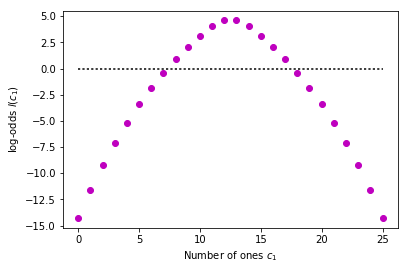

In [4]:
# Number of Trials
N = 25

l = np.zeros(N+1)
for c in range(0,N+1):
    l[c] = log_odds(N-c, c, a1, b1, a2, b2)
    
plt.plot(range(0,N+1), l, 'mo')
plt.plot(range(0,N+1), np.zeros(N+1), 'k:')
ax = plt.gca()
ax.set_xlabel('Number of ones $c_1$')
ax.set_ylabel('log-odds $l(c_1)$')
plt.show()

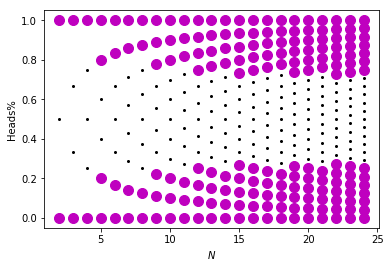

In [5]:
for N in range(1, 25):

    l = np.zeros(N+1)
    for c in range(0,N+1):
        l[c] = log_odds(N-c, c, a1, b1, a2, b2)
    
    p = np.arange(0,N+1)/float(N)
    index_fair = np.where(np.array(l)>0)
    index_fake = np.where(np.array(l)<0)
    plt.plot(N*np.ones_like(p[index_fair]), p[index_fair], '.k',markersize=4)    
    plt.plot(N*np.ones_like(p[index_fake]), p[index_fake], '.m',markersize=20)

plt.xlabel('$N$')
plt.ylabel('Heads%')
plt.show()

### 2.Q74 from Booklet

$$
p(n=i|x_{1:50})=\frac{p(n=i,x_{1:50})}{p(x_{1:50})}
\\
p(n=i,x_{1:50})=\int\limits_0^1\int\limits_0^1 p(n=i,x_{1:50},\pi_1,\pi_2)\,d\pi_1d\pi_2=\int\limits_0^1\int\limits_0^1 p(x_{1:50}|n=i,\pi_1,\pi_2)p(n=i)p(\pi_1)p(\pi_2)\,d\pi_1d\pi_2
\\
p(x_{1:50}|n=i,\pi_1,\pi_2)=\bigg(\prod_{i=1}^{n-1} \pi_1^{x_i} (1-\pi_1)^{1-x_i}\bigg)\bigg(\prod_{i=n}^{50} \pi_2^{x_i} (1-\pi_2)^{1-x_i}\bigg)
\\
p(n=i,x_{1:50})=\frac{1}{50}\int\limits_0^1\int\limits_0^1\bigg(\prod_{i=1}^{n-1} \pi_1^{x_i} (1-\pi_1)^{1-x_i}\bigg)\bigg(\prod_{i=n}^{50} \pi_2^{x_i} (1-\pi_2)^{1-x_i}\bigg)\bigg(\frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}\bigg)^2 \pi_1^{\alpha-1}(1-\pi_1)^{\beta-1} \pi_2^{\alpha-1}(1-\pi_2)^{\beta-1} \,d\pi_1d\pi_2 \\
=\frac{1}{50}\bigg(\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\bigg)^2\frac{\Gamma(\alpha+a_1)\Gamma(\beta+b_1)}{\Gamma(\alpha+\beta+a_1+b_1)}\frac{\Gamma(\alpha+a_2)\Gamma(\beta+b_2)}{\Gamma(\alpha+\beta+a_2+b_2)}
\\
$$<br><br>
$a_1$=number of 1's before the n
<br>
$b_1$=number of 0's before the n
<br>
$a_2$=number of 1's after the n
<br>
$b_2$=number of 0's after the n
<br>
$\alpha=\beta=1$

Maximum probability of the changepoint is at n equals:
25


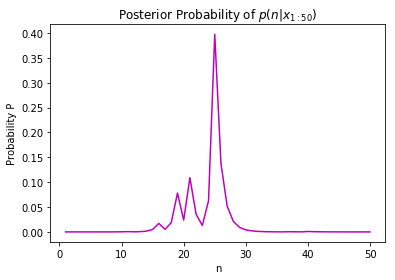

In [6]:
Dataset = np.array([0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1]);
Probability = np.zeros((50,1))
summ = 0
maxx = 0
for n in range(50):
    a1 = sum(Dataset[0:n])
    b1 = n - a1
    a2 = sum(Dataset[n:len(Dataset)])
    b2 = len(Dataset)- n - a2
    Probability[n] = (((gamma(2)/(gamma(1)*gamma(1)))**2)*(gamma(1+a1)*gamma(1+b1)/gamma(2+a1+b1))*(gamma(1+a2)*gamma(1+b2)/gamma(2+a2+b2)))/50
    summ = summ + Probability[n]
    if Probability[n] >= maxx:
        maxx = Probability[n]
        index = n
Probability = Probability/summ
print "Maximum probability of the changepoint is at n equals:"
print index+1
plt.plot(range(1,51),Probability,'m')
plt.xlabel("n")
plt.ylabel("Probability P")
plt.title("Posterior Probability of $p(n|x_{1:50})$")
plt.show()